Coursera project for Classification 
AU:Ozgur Gulari

Objective:
The main objective of my project is to focus on predicting. 
Based on the given information define if the wine is good or not. 

Dependent variable : column good(boolean: 1 as True
                                          0 as False)
                                          


In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Scaler
from sklearn.preprocessing import StandardScaler
# For holdout
from sklearn.model_selection import train_test_split, GridSearchCV
# For logit
from sklearn.linear_model import LogisticRegression
# For Random Forest
from sklearn.ensemble import RandomForestClassifier
#for using Decision Tree Algoithm
from sklearn.tree import DecisionTreeClassifier 
#for Support Vector Machine (SVM) Algorithm
from sklearn import svm  
# for K nearest neighbours
from sklearn.neighbors import KNeighborsClassifier  
# For additional metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay, classification_report



import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress = True, formatter = {'float_kind':'{:f}'.format})
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# Read Data
# DATA source : https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/

wine_data = pd.read_csv('winequality_red.csv')

In [3]:
# Describe the data
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.000,8.320,1.741,4.600,7.100,7.900,9.200,15.900
volatile_acidity,1599.000,0.528,0.179,0.120,0.390,0.520,0.640,1.580
citric_acid,1599.000,0.271,0.195,0.000,0.090,0.260,0.420,1.000
residual_sugar,1599.000,2.539,1.410,0.900,1.900,2.200,2.600,15.500
chlorides,1599.000,0.087,0.047,0.012,0.070,0.079,0.090,0.611
free_sulfur_dioxide,1599.000,15.875,10.460,1.000,7.000,14.000,21.000,72.000
total_sulfur_dioxide,1599.000,46.468,32.895,6.000,22.000,38.000,62.000,289.000
density,1599.000,0.997,0.002,0.990,0.996,0.997,0.998,1.004
pH,1599.000,3.311,0.154,2.740,3.210,3.310,3.400,4.010
sulphates,1599.000,0.658,0.170,0.330,0.550,0.620,0.730,2.000


EDA:
1 - Check missing Values 
2 - Check dtypes to see if we need to encode anything.
3 - Check if we have any columns that are only contains one value. 
4 - Correlation Matrix and Heatmap for checking the relationship between dep and indep vars. 
5 - Check outliers.

In [4]:
# Check missing Values
missing = [x for x in wine_data.columns if wine_data[x].isnull().sum() > 0]

if len(missing):
    print(f'Missings Found for \n{missing}')
else:
    print('No missings Found in the data!')

No missings Found in the data!


In [5]:
# 2 - Check dtypes to see if we need to encode anything. 

non_numeric_cols = wine_data.select_dtypes(exclude=[np.number]).columns.to_list()
numeric_cols = wine_data.select_dtypes(include=[np.number]).columns.to_list()
if non_numeric_cols:
    print(f'Columns needs to be encoded {non_numeric_cols}')
else:
    print('All columns are numeric')

All columns are numeric


In [6]:
# Check if we have any columns that are only contains constant_value. 

constant_value_lst = [x for x in wine_data.columns if wine_data[x].nunique() <= 1]
if constant_value_lst:
    print(f'Constant column lst {constant_value_lst}')
else:
    print('No columns are constant')

No columns are constant


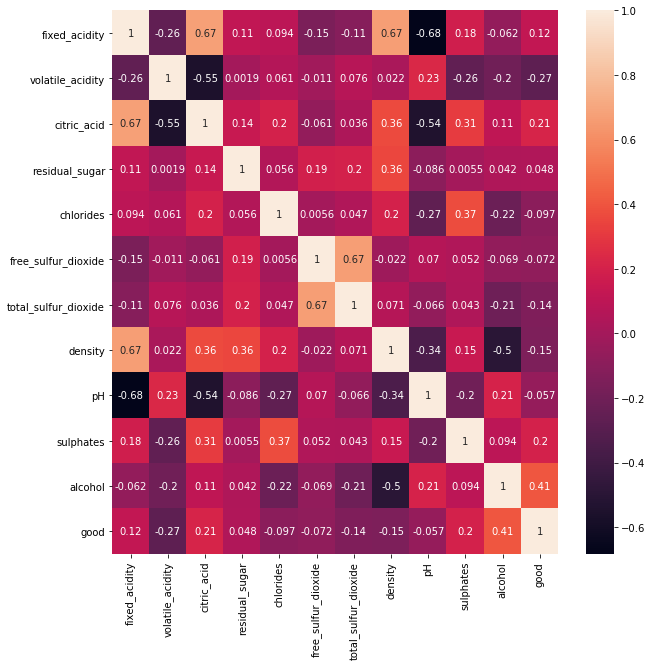

In [7]:
# 4 - Correlation Matrix and Heatmap for checking the relationship between dep and indep vars. 
correlation = wine_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True)
plt.show()

In [8]:
# 5 - Check outliers. and check the ratio of Good wines to not
ratio = wine_data.loc[wine_data['good'] == 1, 'good'].count() / len(wine_data['good'])
count = wine_data.loc[wine_data['good'] == 1, 'good'].count()
print(f'Before outlier handling Ratio of good wine count in the data {ratio} and count {count}')

# Ratio is a bit low, we can consider about oversampling or undersampling

# IQR (Interquartile Range) Method for outliers.

# 

Before outlier handling Ratio of good wine count in the data 0.1357098186366479 and count 217


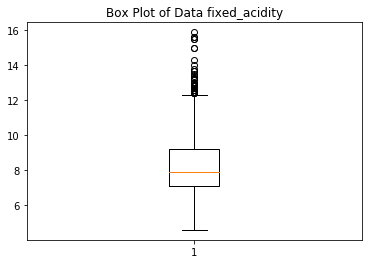

Outliers for fixed_acidity: []


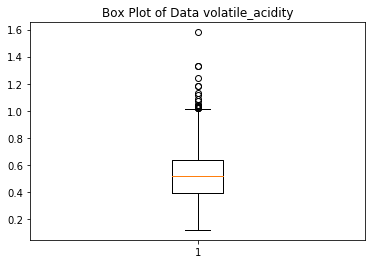

Outliers for volatile_acidity: []


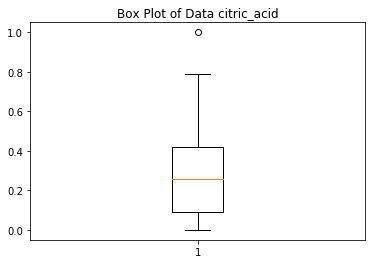

Outliers for citric_acid: []


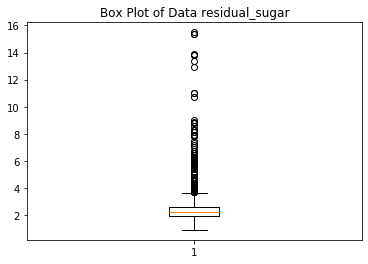

Outliers for residual_sugar: [10.7, 11.0, 11.0, 15.5, 12.9, 13.4, 15.4, 15.4, 13.8, 13.8, 13.9]
Outliers deleted


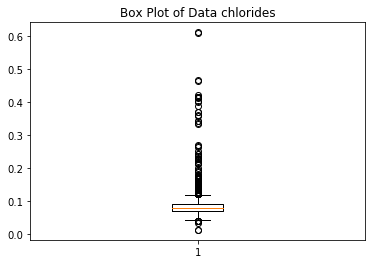

Outliers for chlorides: [0.358, 0.368, 0.341, 0.332, 0.464, 0.401, 0.467, 0.236, 0.61, 0.36, 0.27, 0.337, 0.263, 0.611, 0.343, 0.413, 0.25, 0.422, 0.387, 0.415, 0.243, 0.241, 0.414, 0.369, 0.403, 0.414, 0.415, 0.415, 0.267, 0.235, 0.23]
Outliers deleted


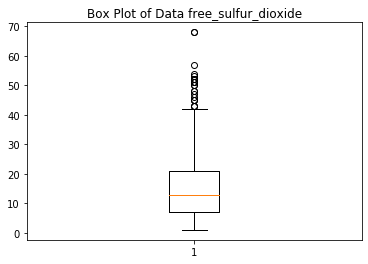

Outliers for free_sulfur_dioxide: []


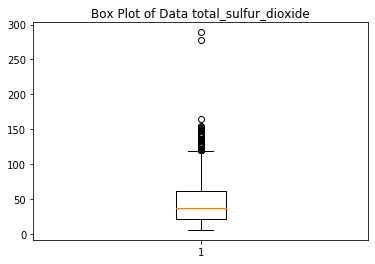

Outliers for total_sulfur_dioxide: [278.0, 289.0]
Outliers deleted


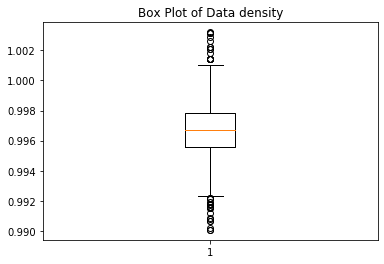

Outliers for density: []


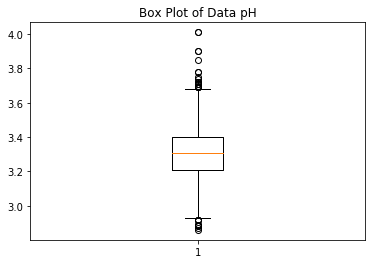

Outliers for pH: []


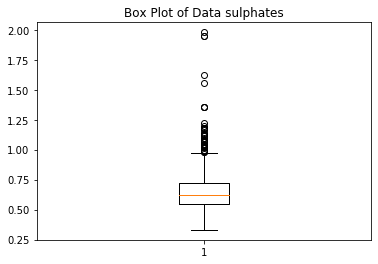

Outliers for sulphates: [1.95, 1.95, 1.98, 1.62]
Outliers deleted


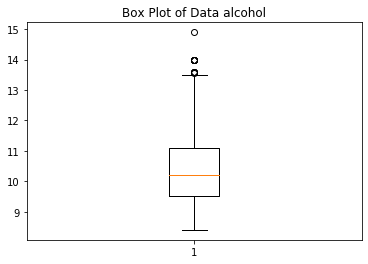

Outliers for alcohol: []



In [9]:
# Create a box plot to visualize the data

for cols in wine_data.columns:
    # no need to check dep var
    if cols == 'good':
        continue
    plt.boxplot(wine_data[cols])
    plt.title(f'Box Plot of Data {cols}')
    plt.show()

    # Calculate the IQR and identify outliers
    Q1 = np.percentile(wine_data[cols], 5)
    Q3 = np.percentile(wine_data[cols], 95)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = [x for x in wine_data[cols] if x < lower_bound or x > upper_bound]
    print(f"Outliers for {cols}: {outliers}")
    if outliers:
        wine_data = wine_data[(wine_data[cols] >= lower_bound) & (wine_data[cols] <= upper_bound)]
        print('Outliers deleted')
        
print()

In [10]:
# 5 - Check outliers. and check the ratio of Good wines to not
ratio = wine_data.loc[wine_data['good'] == 1, 'good'].count() / len(wine_data['good'])
count = wine_data.loc[wine_data['good'] == 1, 'good'].count()
print(f'After outlier handling Ratio of good wine count in the data {ratio} and count {count}')

# Ratio is a bit low, we can consider about oversampling or undersampling


After outlier handling Ratio of good wine count in the data 0.13797549967762734 and count 214


In [11]:
# the target column (in this case 'good') should not be included in variables
# Categorical variables may or maynot be added if any
columns = [x for x in wine_data.columns if x!='good']
variables = wine_data[columns]

# The constant term represents the intercept in a linear regression model.
# It's added because VIF calculations assume that a linear regression is performed.
x = add_constant(variables)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
vif['features'] = x.columns
vif
# if any of them were higher than 10 I would delete it to prevent multicollinearity (not the constant)

,VIF,features
0,1851878.904,const
1,8.048,fixed_acidity
2,1.830,volatile_acidity
3,3.129,citric_acid
4,1.659,residual_sugar
5,1.211,chlorides
6,2.007,free_sulfur_dioxide
7,2.232,total_sulfur_dioxide
8,6.685,density
9,3.266,pH


In [12]:
"""

Now the modeling part, test train split and scaling

"""
# Now we need to scale the data, I'm going to use standard scaler. z transformation
# Dep_Var
x = wine_data.drop('good', axis =1)

# indep_var
y = wine_data['good']

scaler = StandardScaler()

scaler.fit(x)
scaled_x = scaler.transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size = 0.3, random_state  = 999)


Cross-Validation Scores for Ensemble: [0.884793 0.884793 0.894009 0.889401 0.898618]
Mean CV Accuracy for Ensemble: 0.8903225806451613
Test Set Accuracy for Ensemble: 0.8927038626609443
Classification Report for Ensemble:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       402
           1       0.69      0.39      0.50        64

    accuracy                           0.89       466
   macro avg       0.80      0.68      0.72       466
weighted avg       0.88      0.89      0.88       466



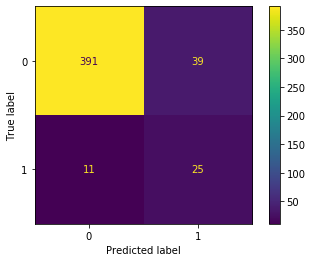

In [21]:
# Model run with imbalances

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, cross_val_score

# Model Instances
# Random Forest Classifier
rfc = RandomForestClassifier()
# Support vector machines
svm_ = svm.SVC() 
# Logistic Regression
log_reg = LogisticRegression(solver='saga')
# Decision Tree
tree = DecisionTreeClassifier()


# Define the hyperparameter grid to search
# random forest
rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# for the SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# For logit
logit_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],           
    'C': [0.001, 0.01, 0.5, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]}

# For Tree
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV objects for all models
# n_jobs for parallel running -1 is all processors

rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)
svm_grid_search = GridSearchCV(estimator=svm_, param_grid=svm_param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)
log_grid_search = GridSearchCV(estimator=log_reg, param_grid=logit_param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)
tree_grid_search = GridSearchCV(estimator=tree, param_grid=tree_param_grid, cv=5, scoring='balanced_accuracy', n_jobs=-1)

# Perform grid search t
rfc_grid_search.fit(x_train, y_train)
svm_grid_search.fit(x_train, y_train)
log_grid_search.fit(x_train, y_train)
tree_grid_search.fit(x_train, y_train)

# Best hyperparameters
best_rfc = rfc_grid_search.best_estimator_
best_svm = svm_grid_search.best_estimator_
best_log = log_grid_search.best_estimator_
best_tree = tree_grid_search.best_estimator_

# Combine the optimized models into an ensemble (Voting Classifier)
ensemble = VotingClassifier(estimators=[('rfc', best_rfc),
                                        ('svm', best_svm),
                                        ('logistic', best_log),
                                        ('tree', best_tree)
                                        ], voting='hard')

# Evaluate the ensemble using cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=999)
cv_scores = cross_val_score(ensemble, x_train, y_train, cv=kfold, scoring='accuracy')

print("Cross-Validation Scores for Ensemble:", cv_scores)
print("Mean CV Accuracy for Ensemble:", cv_scores.mean())

# Train the ensemble model on the entire training set
ensemble.fit(x_train, y_train)

# Make predictions on the test set using the ensemble
y_pred_ensemble = ensemble.predict(x_test)

# Calculate accuracy and other evaluation metrics for the ensemble
acc_ensemble = accuracy_score(y_pred_ensemble, y_test)
print("Test Set Accuracy for Ensemble:", acc_ensemble)

# Calculate the confusion matrix and display it
conf_matrix = confusion_matrix(y_pred_ensemble, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ensemble.classes_)
disp.plot()

# Print the classification report for the ensemble
print("Classification Report for Ensemble:\n", classification_report(y_test, y_pred_ensemble))

Cross-Validation Scores for Ensemble: [0.866359 0.889401 0.907834 0.898618 0.889401]
Mean CV Accuracy for Ensemble: 0.8903225806451612
Test Set Accuracy for Ensemble: 0.8991416309012875
Classification Report for Ensemble:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       402
           1       0.74      0.41      0.53        64

    accuracy                           0.90       466
   macro avg       0.83      0.69      0.73       466
weighted avg       0.89      0.90      0.89       466



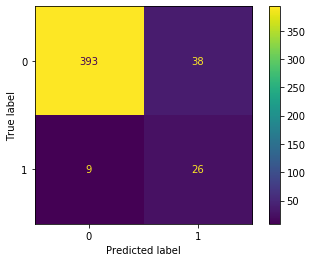

In [13]:
# Model run with imbalances

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, cross_val_score

# Model Instances
# Random Forest Classifier
rfc = RandomForestClassifier()
# Support vector machines
svm_ = svm.SVC() 
# Logistic Regression
log_reg = LogisticRegression(solver='saga')
# Decision Tree
tree = DecisionTreeClassifier()


# Define the hyperparameter grid to search
# random forest
rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# for the SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# For logit
logit_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],           
    'C': [0.001, 0.01, 0.5, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]}

# For Tree
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV objects for all models
# n_jobs for parallel running -1 is all processors

rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search = GridSearchCV(estimator=svm_, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
log_grid_search = GridSearchCV(estimator=log_reg, param_grid=logit_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
tree_grid_search = GridSearchCV(estimator=tree, param_grid=tree_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search t
rfc_grid_search.fit(x_train, y_train)
svm_grid_search.fit(x_train, y_train)
log_grid_search.fit(x_train, y_train)
tree_grid_search.fit(x_train, y_train)

# Best hyperparameters
best_rfc = rfc_grid_search.best_estimator_
best_svm = svm_grid_search.best_estimator_
best_log = log_grid_search.best_estimator_
best_tree = tree_grid_search.best_estimator_

# Combine the optimized models into an ensemble (Voting Classifier)
ensemble = VotingClassifier(estimators=[('rfc', best_rfc),
                                        ('svm', best_svm),
                                        ('logistic', best_log),
                                        ('tree', best_tree)
                                        ], voting='hard')

# Evaluate the ensemble using cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=999)
cv_scores = cross_val_score(ensemble, x_train, y_train, cv=kfold, scoring='accuracy')

print("Cross-Validation Scores for Ensemble:", cv_scores)
print("Mean CV Accuracy for Ensemble:", cv_scores.mean())

# Train the ensemble model on the entire training set
ensemble.fit(x_train, y_train)

# Make predictions on the test set using the ensemble
y_pred_ensemble = ensemble.predict(x_test)

# Calculate accuracy and other evaluation metrics for the ensemble
acc_ensemble = accuracy_score(y_pred_ensemble, y_test)
print("Test Set Accuracy for Ensemble:", acc_ensemble)

# Calculate the confusion matrix and display it
conf_matrix = confusion_matrix(y_pred_ensemble, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ensemble.classes_)
disp.plot()

# Print the classification report for the ensemble
print("Classification Report for Ensemble:\n", classification_report(y_test, y_pred_ensemble))

Cross-Validation Scores for Ensemble: [0.943850 0.911765 0.946524 0.941176 0.951872]
Mean CV Accuracy for Ensemble: 0.9390374331550803
Test Set Accuracy for Ensemble: 0.9034334763948498
Classification Report for Ensemble:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       402
           1       0.67      0.59      0.63        64

    accuracy                           0.90       466
   macro avg       0.80      0.77      0.79       466
weighted avg       0.90      0.90      0.90       466



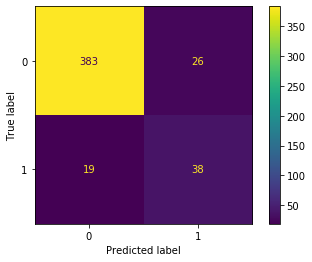

In [14]:
# Model with 

# Model run with imbalances
# Synthetic Minority Over-sampling. 
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, cross_val_score

# Model Instances
# Random Forest Classifier
rfc = RandomForestClassifier()
# Support vector machines
svm_ = svm.SVC() 
# Logistic Regression
log_reg = LogisticRegression(solver='saga')
# Decision Tree
tree = DecisionTreeClassifier()

# Create an instance of the SMOTE oversampler
smote = SMOTE(random_state=99)

# Apply SMOTE to the training data to oversample the minority class
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Define the hyperparameter grid to search
# random forest
rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# for the SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# For logit
logit_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],           
    'C': [0.001, 0.01, 0.5, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]}

# For Tree
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV objects for all models
# n_jobs for parallel running -1 is all processors
rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search = GridSearchCV(estimator=svm_, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
log_grid_search = GridSearchCV(estimator=log_reg, param_grid=logit_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
tree_grid_search = GridSearchCV(estimator=tree, param_grid=tree_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search t
rfc_grid_search.fit(x_train_resampled, y_train_resampled)
svm_grid_search.fit(x_train_resampled, y_train_resampled)
log_grid_search.fit(x_train_resampled, y_train_resampled)
tree_grid_search.fit(x_train_resampled, y_train_resampled)

# Best hyperparameters
best_rfc = rfc_grid_search.best_estimator_
best_svm = svm_grid_search.best_estimator_
best_log = log_grid_search.best_estimator_
best_tree = tree_grid_search.best_estimator_

# Combine the optimized models into an ensemble (Voting Classifier)
ensemble = VotingClassifier(estimators=[('rfc', best_rfc),
                                        ('svm', best_svm),
                                        ('logistic', best_log),
                                        ('tree', best_tree)
                                        ], voting='hard')

# Evaluate the ensemble using cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=999)
cv_scores = cross_val_score(ensemble, x_train_resampled, y_train_resampled, cv=kfold, scoring='accuracy')

print("Cross-Validation Scores for Ensemble:", cv_scores)
print("Mean CV Accuracy for Ensemble:", cv_scores.mean())

# Train the ensemble model on the entire training set
ensemble.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set using the ensemble
y_pred_ensemble = ensemble.predict(x_test)

# Calculate accuracy and other evaluation metrics for the ensemble
acc_ensemble = accuracy_score(y_pred_ensemble, y_test)
print("Test Set Accuracy for Ensemble:", acc_ensemble)

# Calculate the confusion matrix and display it
conf_matrix = confusion_matrix(y_pred_ensemble, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ensemble.classes_)
disp.plot()

# Print the classification report for the ensemble
print("Classification Report for Ensemble:\n", classification_report(y_test, y_pred_ensemble))

Cross-Validation Scores for Ensemble: [0.970588 0.978610 0.978610 0.983957 0.983957]
Mean CV Accuracy for Ensemble: 0.979144385026738
Test Set Accuracy for Ensemble: 0.9098712446351931
Classification Report for Ensemble:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       402
           1       0.72      0.56      0.63        64

    accuracy                           0.91       466
   macro avg       0.83      0.76      0.79       466
weighted avg       0.90      0.91      0.91       466



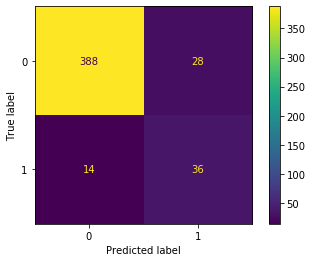

In [15]:
# Model with 

# Model run with imbalances

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, cross_val_score

# Model Instances
# Random Forest Classifier
rfc = RandomForestClassifier()
# Support vector machines
svm_ = svm.SVC() 
# Logistic Regression
log_reg = LogisticRegression(solver='saga')
# Decision Tree
tree = DecisionTreeClassifier()

# Create an instance of the RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Apply random oversampling to the training data
x_train_oversampled, y_train_oversampled = oversampler.fit_resample(x_train, y_train)

# Define the hyperparameter grid to search
# random forest
rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# for the SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# For logit
logit_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],           
    'C': [0.001, 0.01, 0.5, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]}

# For Tree
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV objects for all models
# n_jobs for parallel running -1 is all processors
rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search = GridSearchCV(estimator=svm_, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
log_grid_search = GridSearchCV(estimator=log_reg, param_grid=logit_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
tree_grid_search = GridSearchCV(estimator=tree, param_grid=tree_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search t
rfc_grid_search.fit(x_train_oversampled, y_train_oversampled)
svm_grid_search.fit(x_train_oversampled, y_train_oversampled)
log_grid_search.fit(x_train_oversampled, y_train_oversampled)
tree_grid_search.fit(x_train_oversampled, y_train_oversampled)

# Best hyperparameters
best_rfc = rfc_grid_search.best_estimator_
best_svm = svm_grid_search.best_estimator_
best_log = log_grid_search.best_estimator_
best_tree = tree_grid_search.best_estimator_

# Combine the optimized models into an ensemble (Voting Classifier)
ensemble = VotingClassifier(estimators=[('rfc', best_rfc),
                                        ('svm', best_svm),
                                        ('logistic', best_log),
                                        ('tree', best_tree)
                                        ], voting='hard')

# Evaluate the ensemble using cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=999)
cv_scores = cross_val_score(ensemble, x_train_oversampled, y_train_oversampled, cv=kfold, scoring='accuracy')

print("Cross-Validation Scores for Ensemble:", cv_scores)
print("Mean CV Accuracy for Ensemble:", cv_scores.mean())

# Train the ensemble model on the entire training set
ensemble.fit(x_train_oversampled, y_train_oversampled)

# Make predictions on the test set using the ensemble
y_pred_ensemble = ensemble.predict(x_test)

# Calculate accuracy and other evaluation metrics for the ensemble
acc_ensemble = accuracy_score(y_pred_ensemble, y_test)
print("Test Set Accuracy for Ensemble:", acc_ensemble)

# Calculate the confusion matrix and display it
conf_matrix = confusion_matrix(y_pred_ensemble, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ensemble.classes_)
disp.plot()

# Print the classification report for the ensemble
print("Classification Report for Ensemble:\n", classification_report(y_test, y_pred_ensemble))

Cross-Validation Scores for Ensemble: [0.950000 0.766667 0.800000 0.850000 0.766667]
Mean CV Accuracy for Ensemble: 0.8266666666666668
Test Set Accuracy for Ensemble: 0.8240343347639485
Classification Report for Ensemble:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89       402
           1       0.42      0.75      0.54        64

    accuracy                           0.82       466
   macro avg       0.69      0.79      0.72       466
weighted avg       0.88      0.82      0.84       466



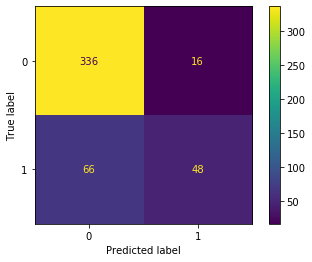

In [16]:
# Model with 

# Model run with imbalances

from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, cross_val_score

# Model Instances
# Random Forest Classifier
rfc = RandomForestClassifier()
# Support vector machines
svm_ = svm.SVC() 
# Logistic Regression
log_reg = LogisticRegression(solver='saga')
# Decision Tree
tree = DecisionTreeClassifier()

# Create an instance of the RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Apply random undersampling to the training data
x_train_undersampled, y_train_undersampled = undersampler.fit_resample(x_train, y_train)

# Define the hyperparameter grid to search
# random forest
rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# for the SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# For logit
logit_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],           
    'C': [0.001, 0.01, 0.5, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]}

# For Tree
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV objects for all models
# n_jobs for parallel running -1 is all processors
rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search = GridSearchCV(estimator=svm_, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
log_grid_search = GridSearchCV(estimator=log_reg, param_grid=logit_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
tree_grid_search = GridSearchCV(estimator=tree, param_grid=tree_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search t
rfc_grid_search.fit(x_train_undersampled, y_train_undersampled)
svm_grid_search.fit(x_train_undersampled, y_train_undersampled)
log_grid_search.fit(x_train_undersampled, y_train_undersampled)
tree_grid_search.fit(x_train_undersampled, y_train_undersampled)

# Best hyperparameters
best_rfc = rfc_grid_search.best_estimator_
best_svm = svm_grid_search.best_estimator_
best_log = log_grid_search.best_estimator_
best_tree = tree_grid_search.best_estimator_

# Combine the optimized models into an ensemble (Voting Classifier)
ensemble = VotingClassifier(estimators=[('rfc', best_rfc),
                                        ('svm', best_svm),
                                        ('logistic', best_log),
                                        ('tree', best_tree)
                                        ], voting='hard')

# Evaluate the ensemble using cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=999)
cv_scores = cross_val_score(ensemble, x_train_undersampled, y_train_undersampled, cv=kfold, scoring='accuracy')

print("Cross-Validation Scores for Ensemble:", cv_scores)
print("Mean CV Accuracy for Ensemble:", cv_scores.mean())

# Train the ensemble model on the entire training set
ensemble.fit(x_train_undersampled, y_train_undersampled)

# Make predictions on the test set using the ensemble
y_pred_ensemble = ensemble.predict(x_test)

# Calculate accuracy and other evaluation metrics for the ensemble
acc_ensemble = accuracy_score(y_pred_ensemble, y_test)
print("Test Set Accuracy for Ensemble:", acc_ensemble)

# Calculate the confusion matrix and display it
conf_matrix = confusion_matrix(y_pred_ensemble, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ensemble.classes_)
disp.plot()

# Print the classification report for the ensemble
print("Classification Report for Ensemble:\n", classification_report(y_test, y_pred_ensemble))

Cross-Validation Scores for Ensemble: [0.916667 0.966667 0.922222 0.927374 0.960894]
Mean CV Accuracy for Ensemble: 0.9387647423960273
Test Set Accuracy for Ensemble: 0.8562231759656652
Classification Report for Ensemble:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91       402
           1       0.48      0.62      0.54        64

    accuracy                           0.86       466
   macro avg       0.71      0.76      0.73       466
weighted avg       0.87      0.86      0.86       466



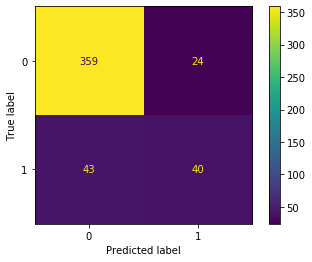

In [17]:
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE

# Model with 

# Model run with imbalances

from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, cross_val_score

# Model Instances
# Random Forest Classifier
rfc = RandomForestClassifier()
# Support vector machines
svm_ = svm.SVC() 
# Logistic Regression
log_reg = LogisticRegression(solver='saga')
# Decision Tree
tree = DecisionTreeClassifier()

x_all_under1, y_all_under1 = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3).fit_resample(x_train, y_train)

# Define the hyperparameter grid to search
# random forest
rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# for the SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# For logit
logit_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],           
    'C': [0.001, 0.01, 0.5, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]}

# For Tree
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV objects for all models
# n_jobs for parallel running -1 is all processors
rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search = GridSearchCV(estimator=svm_, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
log_grid_search = GridSearchCV(estimator=log_reg, param_grid=logit_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
tree_grid_search = GridSearchCV(estimator=tree, param_grid=tree_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search t
rfc_grid_search.fit(x_all_under1, y_all_under1)
svm_grid_search.fit(x_all_under1, y_all_under1)
log_grid_search.fit(x_all_under1, y_all_under1)
tree_grid_search.fit(x_all_under1, y_all_under1)

# Best hyperparameters
best_rfc = rfc_grid_search.best_estimator_
best_svm = svm_grid_search.best_estimator_
best_log = log_grid_search.best_estimator_
best_tree = tree_grid_search.best_estimator_

# Combine the optimized models into an ensemble (Voting Classifier)
ensemble = VotingClassifier(estimators=[('rfc', best_rfc),
                                        ('svm', best_svm),
                                        ('logistic', best_log),
                                        ('tree', best_tree)
                                        ], voting='hard')

# Evaluate the ensemble using cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=999)
cv_scores = cross_val_score(ensemble, x_all_under1, y_all_under1, cv=kfold, scoring='accuracy')

print("Cross-Validation Scores for Ensemble:", cv_scores)
print("Mean CV Accuracy for Ensemble:", cv_scores.mean())

# Train the ensemble model on the entire training set
ensemble.fit(x_all_under1, y_all_under1)

# Make predictions on the test set using the ensemble
y_pred_ensemble = ensemble.predict(x_test)

# Calculate accuracy and other evaluation metrics for the ensemble
acc_ensemble = accuracy_score(y_pred_ensemble, y_test)
print("Test Set Accuracy for Ensemble:", acc_ensemble)

# Calculate the confusion matrix and display it
conf_matrix = confusion_matrix(y_pred_ensemble, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ensemble.classes_)
disp.plot()

# Print the classification report for the ensemble
print("Classification Report for Ensemble:\n", classification_report(y_test, y_pred_ensemble))

Cross-Validation Scores for Ensemble: [0.933333 0.949833 0.963211 0.946488 0.966555]
Mean CV Accuracy for Ensemble: 0.9518840579710144
Test Set Accuracy for Ensemble: 0.8562231759656652
Classification Report for Ensemble:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       402
           1       0.48      0.73      0.58        64

    accuracy                           0.86       466
   macro avg       0.72      0.80      0.75       466
weighted avg       0.89      0.86      0.87       466



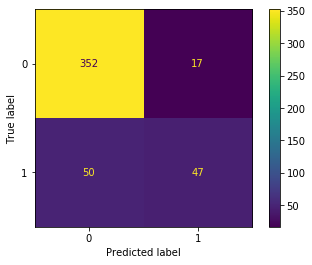

In [18]:
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.over_sampling import SMOTE

# Model with 

# Model run with imbalances

from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold, cross_val_score

# Model Instances
# Random Forest Classifier
rfc = RandomForestClassifier()
# Support vector machines
svm_ = svm.SVC() 
# Logistic Regression
log_reg = LogisticRegression(solver='saga')
# Decision Tree
tree = DecisionTreeClassifier()

# Melanies_technique 
# if len(wine_data) < 5000:
#     nneigbrs = 500
# else:
#     nneigbrs = 1000

X_all_under, y_all_under = EditedNearestNeighbours(sampling_strategy='majority', n_neighbors=3).fit_resample(x_train, y_train)
x_all_under2, y_all_under2 = SMOTE(sampling_strategy=1, random_state=42).fit_resample(X_all_under, y_all_under)

# Define the hyperparameter grid to search
# random forest
rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# for the SVM
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1],
}

# For logit
logit_param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],           
    'C': [0.001, 0.01, 0.5, 0.1, 1, 10],
    'l1_ratio': [0.2, 0.5, 0.8]}

# For Tree
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV objects for all models
# n_jobs for parallel running -1 is all processors
rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid_search = GridSearchCV(estimator=svm_, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
log_grid_search = GridSearchCV(estimator=log_reg, param_grid=logit_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
tree_grid_search = GridSearchCV(estimator=tree, param_grid=tree_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search t
rfc_grid_search.fit(x_all_under2, y_all_under2)
svm_grid_search.fit(x_all_under2, y_all_under2)
log_grid_search.fit(x_all_under2, y_all_under2)
tree_grid_search.fit(x_all_under2, y_all_under2)

# Best hyperparameters
best_rfc = rfc_grid_search.best_estimator_
best_svm = svm_grid_search.best_estimator_
best_log = log_grid_search.best_estimator_
best_tree = tree_grid_search.best_estimator_

# Combine the optimized models into an ensemble (Voting Classifier)
ensemble = VotingClassifier(estimators=[('rfc', best_rfc),
                                        ('svm', best_svm),
                                        ('logistic', best_log),
                                        ('tree', best_tree)
                                        ], voting='hard')

# Evaluate the ensemble using cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=999)
cv_scores = cross_val_score(ensemble, x_all_under2, y_all_under2, cv=kfold, scoring='accuracy')

print("Cross-Validation Scores for Ensemble:", cv_scores)
print("Mean CV Accuracy for Ensemble:", cv_scores.mean())

# Train the ensemble model on the entire training set
ensemble.fit(x_all_under2, y_all_under2)

# Make predictions on the test set using the ensemble
y_pred_ensemble = ensemble.predict(x_test)

# Calculate accuracy and other evaluation metrics for the ensemble
acc_ensemble = accuracy_score(y_pred_ensemble, y_test)
print("Test Set Accuracy for Ensemble:", acc_ensemble)

# Calculate the confusion matrix and display it
conf_matrix = confusion_matrix(y_pred_ensemble, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=ensemble.classes_)
disp.plot()

# Print the classification report for the ensemble
print("Classification Report for Ensemble:\n", classification_report(y_test, y_pred_ensemble))

In [19]:
print('Orig y_train               :', len(y_train), 'class 1 ratio', (y_train == 1).sum() / (y_train).count())
print('Orig y_train_sampled SMOTE :', len(y_train_resampled), 'class 1 ratio', (y_train_resampled == 1).sum() / len(y_train_resampled))
print('Orig y_train_oversampled   :', len(y_train_oversampled), 'class 1 ratio', (y_train_oversampled == 1).sum() / len(y_train_oversampled))
print('Orig y_train_undersampled  :', len(y_train_undersampled), 'class 1 ratio', (y_train_undersampled == 1).sum() / len(y_train_undersampled))
print('Orig y_train_EditedNearest :', len(y_all_under1), 'class 1 ratio', (y_all_under1 == 1).sum() / len(y_all_under1))
print('Orig y_train_Edited&SMOTE  :', len(y_all_under2), 'class 1 ratio', (y_all_under2 == 1).sum() / len(y_all_under2))

Orig y_train               : 1085 class 1 ratio 0.1382488479262673
Orig y_train_sampled SMOTE : 1870 class 1 ratio 0.5
Orig y_train_oversampled   : 1870 class 1 ratio 0.5
Orig y_train_undersampled  : 300 class 1 ratio 0.5
Orig y_train_EditedNearest : 898 class 1 ratio 0.16703786191536749
Orig y_train_Edited&SMOTE  : 1496 class 1 ratio 0.5


In [20]:
print('class 1 ratio', (y_test == 1).sum())
'class 1 ratio', (y_test == 0).sum()

class 1 ratio 64


('class 1 ratio', 402)